In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/content/AMZN_data_1999_2022.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1,1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
2,1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
3,1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
4,1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000


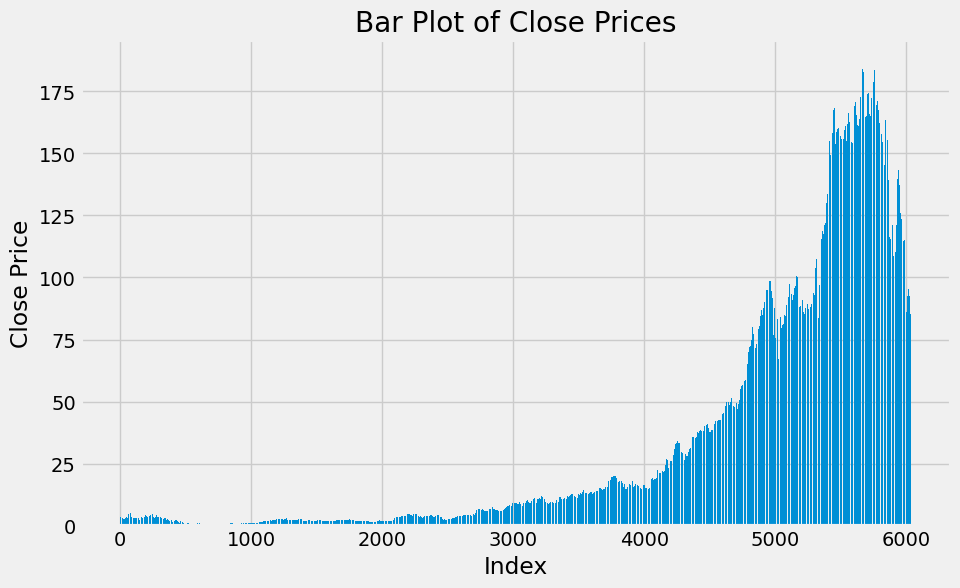

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Close'])
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Bar Plot of Close Prices')
plt.show()

In [5]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]
df = df[['ds', 'y']]

df.head()

,ds,y
0,1999-01-04,2.957813
1,1999-01-05,3.112500
2,1999-01-06,3.450000
3,1999-01-07,3.971875
4,1999-01-08,4.006250


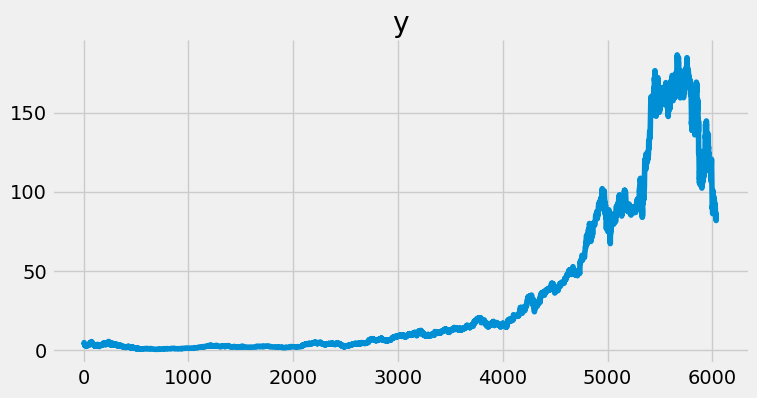

In [6]:
df['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [8]:
model = fbp.Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimp9e916/kc9x9i7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimp9e916/vdhtijd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79903', 'data', 'file=/tmp/tmpimp9e916/kc9x9i7x.json', 'init=/tmp/tmpimp9e916/vdhtijd0.json', 'output', 'file=/tmp/tmpimp9e916/prophet_modelzbvtnqcs/prophet_model-20241030092313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
865,2022-12-23,161.157635,151.199377,168.956692,152.973447,168.079656,-0.596770,-0.596770,-0.596770,0.172920,0.172920,0.172920,-0.769690,-0.769690,-0.769690,0.0,0.0,0.0,160.560866
866,2022-12-27,161.367730,151.798933,169.313249,153.166381,168.305384,-0.628337,-0.628337,-0.628337,0.221085,0.221085,0.221085,-0.849422,-0.849422,-0.849422,0.0,0.0,0.0,160.739393
867,2022-12-28,161.420254,151.298824,168.902327,153.201744,168.373541,-0.662104,-0.662104,-0.662104,0.192409,0.192409,0.192409,-0.854513,-0.854513,-0.854513,0.0,0.0,0.0,160.758150
868,2022-12-29,161.472778,151.460797,169.761385,153.237106,168.439883,-0.638687,-0.638687,-0.638687,0.214728,0.214728,0.214728,-0.853415,-0.853415,-0.853415,0.0,0.0,0.0,160.834091
869,2022-12-30,161.525302,152.142960,168.875124,153.272469,168.504005,-0.673297,-0.673297,-0.673297,0.172920,0.172920,0.172920,-0.846217,-0.846217,-0.846217,0.0,0.0,0.0,160.852005


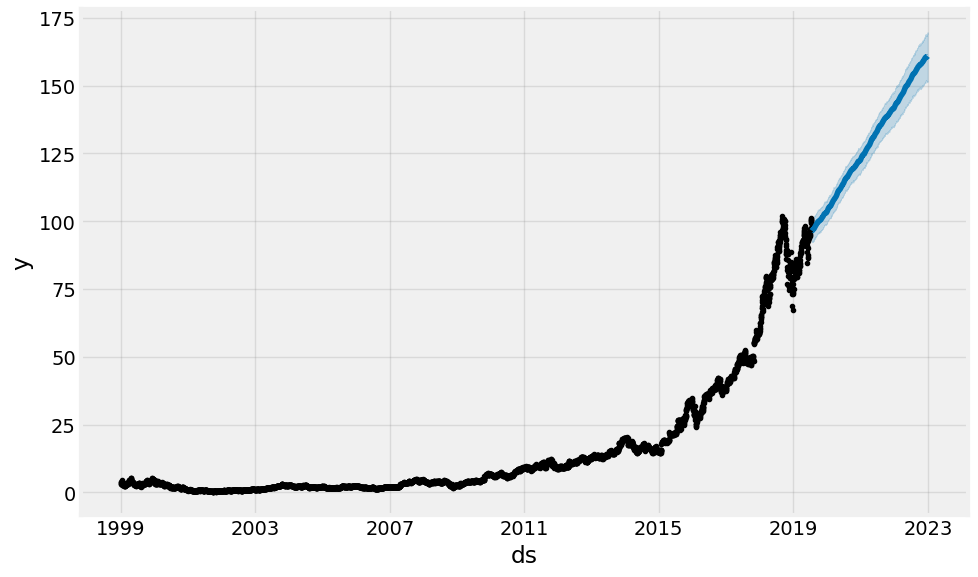

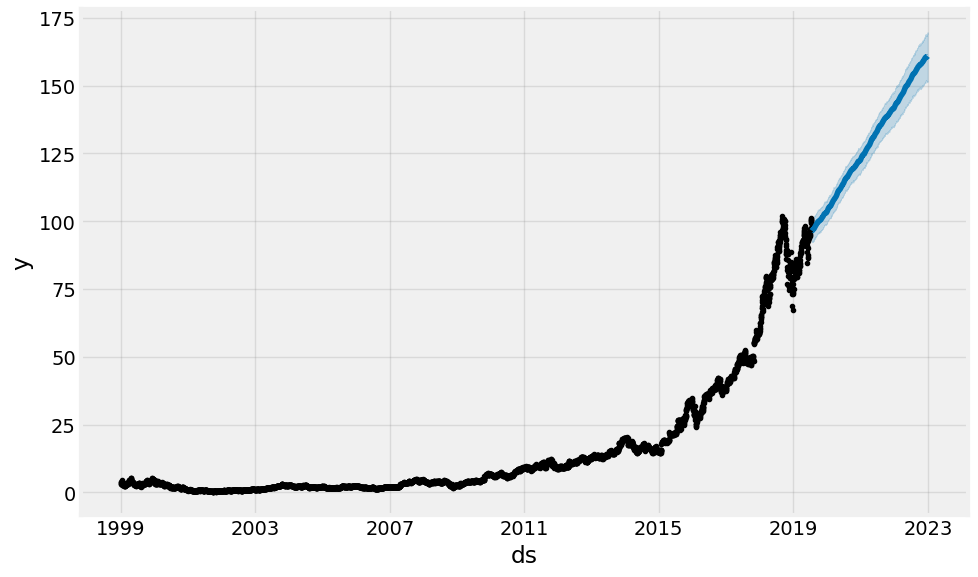

In [10]:
model.plot(forecast)

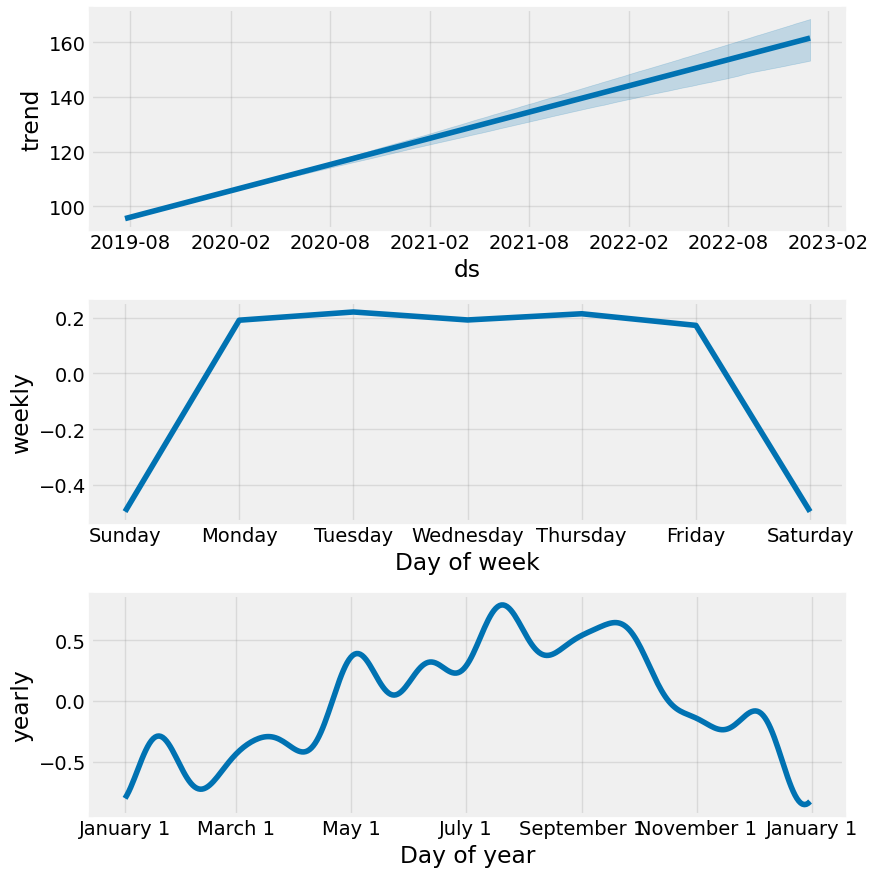

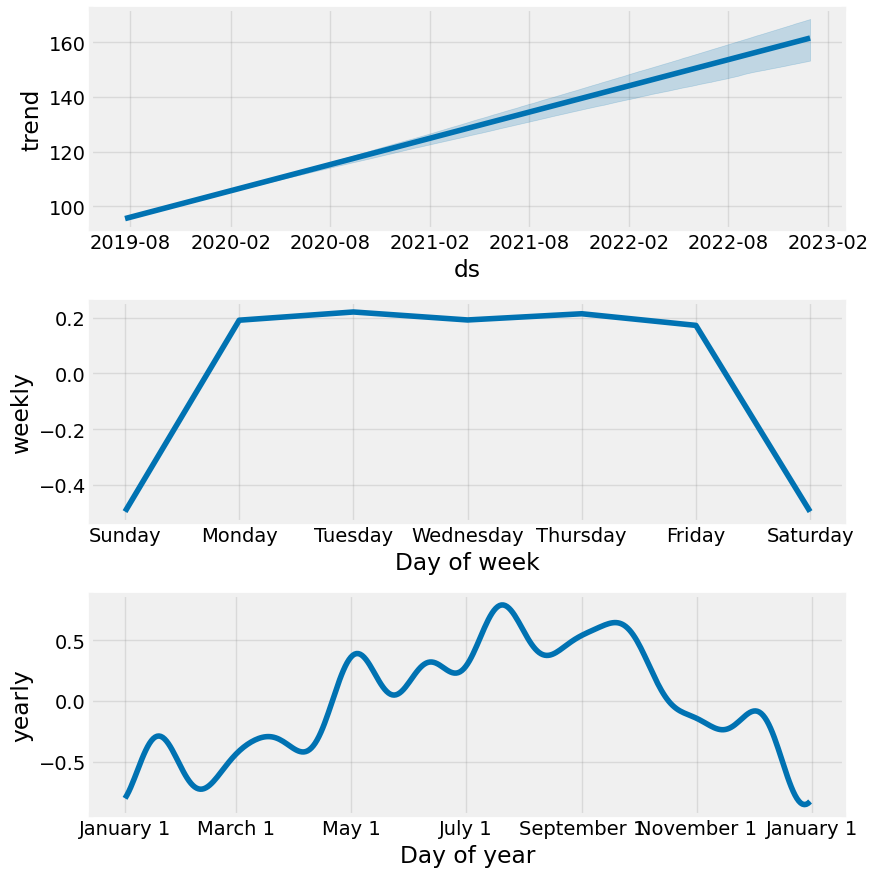

In [11]:
model.plot_components(forecast)

In [12]:
print("MSE:", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("MAE:", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

MSE: 1058.2220288546353
MAE: 28.00036661731466


In [13]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE: ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

MAPE:  21.195068623383225
